In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Natural Language Processing with Disaster Tweets
​
​
Predict which Tweets are about real disasters and which ones are not
## What should I expect the data format to be?
Each sample in the train and test set has the following information:

The text of a tweet

* A keyword from that tweet (although this may be blank!)
* The location the tweet was sent from (may also be blank) 
## What am I predicting?
* You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.
### Columns

* id - a unique identifier for each tweet
* text - the text of the tweet
* location - the location the tweet was sent from (may be blank)
* keyword - a particular keyword from the tweet (may be blank)
* target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

# Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.rcParams['figure.figsize']=[15,8]

# Read the train and test datasets

In [5]:
train = pd.read_csv('train.csv')
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [9]:
test = pd.read_csv('test.csv')
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


# Basic analysis on train and test datasets:

In [10]:
train.shape

(7613, 5)

In [11]:
test.shape

(3263, 4)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [14]:
print(train.size)
print(test.size)

38065
13052


In [15]:
train.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [16]:
test.columns

Index(['id', 'keyword', 'location', 'text'], dtype='object')

# Cleaning the train and test datasets:

In [17]:
print('Pencentage of missing values in train dataset \n',train.isna().sum() / len(train)*100)

Pencentage of missing values in train dataset 
 id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64


In [18]:
print('Pencentage of missing values in test dataset \n',test.isna().sum() / len(train)*100)

Pencentage of missing values in test dataset 
 id           0.000000
keyword      0.341521
location    14.514646
text         0.000000
dtype: float64


In [19]:
train.fillna("0", inplace=True)
test.fillna("0", inplace=True)

# Exploratory Data Analysis 
##### (Target column in Train dataset)

In [20]:
train['target'].unique()

array([1, 0], dtype=int64)

In [21]:
x=train['target'].value_counts()
x

0    4342
1    3271
Name: target, dtype: int64

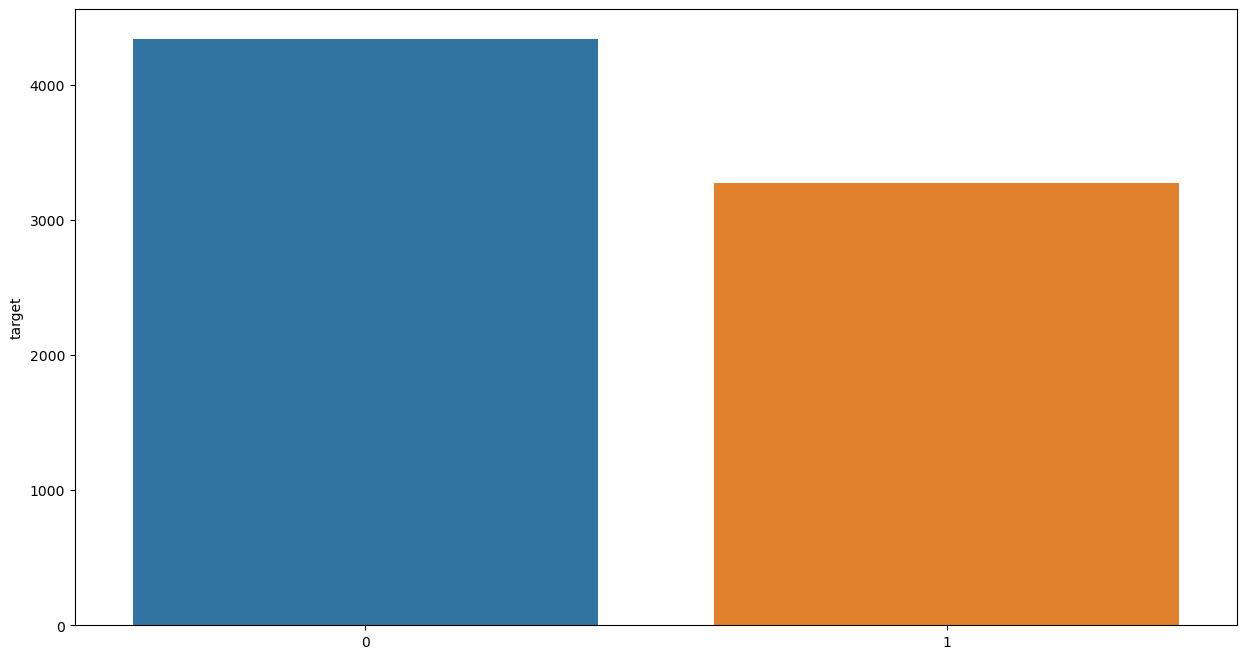

In [22]:
sns.barplot(x = x.index, y = x)
plt.show()

# Text Preprocessing:

In [23]:
import re,string
import nltk
from nltk.tokenize import word_tokenize,WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer,WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag


In [24]:
nltk.download('all')
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping gram

[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nps_chat.zip.
[nltk_data]    | Downloading package omw to
[nltk_data]    |     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\opinion_lexicon.zip.
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package paradigms to
[nltk_data]    | 

[nltk_data]    | Downloading package verbnet3 to
[nltk_data]    |     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\verbnet3.zip.
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\webtext.zip.
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\wmt15_eval.zip.
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\word2vec_sample.zip.
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package w

## Cleaning the 'text' column:

In [25]:
# Define a function to clean the text
def clean(text):
    text = text.lower() #lowercase text
    text = re.sub('[^A-Za-z]+', ' ', str(text)) #removing the special characters and numeric values
    text = re.sub('\s+', ' ', text)  #remove extra space and tabs
    text = re.compile('<.*?>').sub('', text) #removing html tags
    return text

In [26]:
train['cleaned text']=train['text'].apply(clean)
train['cleaned text'].head(5)

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: cleaned text, dtype: object

In [27]:
test['cleaned text']=test['text'].apply(clean)
test['cleaned text'].head(5)

0                   just happened a terrible car crash
1    heard about earthquake is different cities sta...
2    there is a forest fire at spot pond geese are ...
3                apocalypse lighting spokane wildfires
4           typhoon soudelor kills in china and taiwan
Name: cleaned text, dtype: object

## Removal of stopwords

In [28]:
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words("english")]
    return " ".join(a)

In [29]:
train['cleaned text']=train['cleaned text'].apply(stopword)
train['cleaned text']

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       people receive wildfires evacuation orders cal...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    aria ahrary thetawniest control wild fires cal...
7610             utc km volcano hawaii http co zdtoyd ebj
7611    police investigating e bike collided car littl...
7612    latest homes razed northern california wildfir...
Name: cleaned text, Length: 7613, dtype: object

In [30]:
test['cleaned text']=test['cleaned text'].apply(stopword)
test['cleaned text']

0                             happened terrible car crash
1       heard earthquake different cities stay safe ev...
2       forest fire spot pond geese fleeing across str...
3                   apocalypse lighting spokane wildfires
4                     typhoon soudelor kills china taiwan
                              ...                        
3258    earthquake safety los angeles safety fasteners...
3259    storm ri worse last hurricane city amp others ...
3260     green line derailment chicago http co utbxlcbiuy
3261    meg issues hazardous weather outlook hwo http ...
3262    cityofcalgary activated municipal emergency pl...
Name: cleaned text, Length: 3263, dtype: object

## Stemming:

In [31]:
snow = SnowballStemmer("english")
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string)]
    return " ".join(a)

In [32]:
train['cleaned text']=train['cleaned text'].apply(stemming)
train['cleaned text']

0               deed reason earthquak may allah forgiv us
1                    forest fire near la rong sask canada
2       resid ask shelter place notifi offic evacu she...
3             peopl receiv wildfir evacu order california
4       got sent photo rubi alaska smoke wildfir pour ...
                              ...                        
7608    two giant crane hold bridg collaps nearbi home...
7609    aria ahrari thetawniest control wild fire cali...
7610             utc km volcano hawaii http co zdtoyd ebj
7611    polic investig e bike collid car littl portug ...
7612    latest home raze northern california wildfir a...
Name: cleaned text, Length: 7613, dtype: object

In [33]:
test['cleaned text']=test['cleaned text'].apply(stemming)
test['cleaned text']

0                                happen terribl car crash
1           heard earthquak differ citi stay safe everyon
2       forest fire spot pond gees flee across street ...
3                          apocalyps light spokan wildfir
4                      typhoon soudelor kill china taiwan
                              ...                        
3258        earthquak safeti los angel safeti fasten xrwn
3259    storm ri wors last hurrican citi amp other har...
3260         green line derail chicago http co utbxlcbiuy
3261    meg issu hazard weather outlook hwo http co x ...
3262      cityofcalgari activ municip emerg plan yycstorm
Name: cleaned text, Length: 3263, dtype: object

## Lemmatization

In [34]:
wl = WordNetLemmatizer()
 
def pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [35]:
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string))
    a=[wl.lemmatize(tag[0], pos(tag[1])) for idx, tag in enumerate(word_pos_tags)]
    return " ".join(a)

In [36]:
train['cleaned text']=train['cleaned text'].apply(lemmatizer)
train['cleaned text']

0                deed reason earthquak may allah forgiv u
1                    forest fire near la rong sask canada
2       resid ask shelter place notifi offic evacu she...
3             peopl receiv wildfir evacu order california
4       get sent photo rubi alaska smoke wildfir pour ...
                              ...                        
7608    two giant crane hold bridg collaps nearbi home...
7609    aria ahrari thetawniest control wild fire cali...
7610             utc km volcano hawaii http co zdtoyd ebj
7611    polic investig e bike collid car littl portug ...
7612    late home raze northern california wildfir abc...
Name: cleaned text, Length: 7613, dtype: object

In [37]:
test['cleaned text']=test['cleaned text'].apply(lemmatizer)
test['cleaned text']

0                                happen terribl car crash
1           heard earthquak differ citi stay safe everyon
2       forest fire spot pond gee flee across street c...
3                          apocalyps light spokan wildfir
4                      typhoon soudelor kill china taiwan
                              ...                        
3258        earthquak safeti los angel safeti fasten xrwn
3259    storm ri wors last hurrican citi amp other har...
3260         green line derail chicago http co utbxlcbiuy
3261    meg issu hazard weather outlook hwo http co x ...
3262      cityofcalgari activ municip emerg plan yycstorm
Name: cleaned text, Length: 3263, dtype: object

# Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
xtrain,xtest,ytrain,ytest = train_test_split(train['cleaned text'],train['target'],
                                             test_size=0.3,random_state=100)

In [40]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(5329,)
(2284,)
(5329,)
(2284,)


# Vertorization - TF-IDF on Train dataset

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True)

In [42]:
# converting xtrain to vector - Fit and transform 
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
# converting xtest to vector -  transform
xtest_tfidf = tfidf_vectorizer.transform(xtest)

In [43]:
print(xtrain_tfidf)

  (0, 13109)	0.2953278615964043
  (0, 6819)	0.3142525117036636
  (0, 5939)	0.2885733616089154
  (0, 2119)	0.06072402603613517
  (0, 5492)	0.06146898550676112
  (0, 11813)	0.22541724792615872
  (0, 4436)	0.19973809783141058
  (0, 7183)	0.3142525117036636
  (0, 13336)	0.16787006457545442
  (0, 7827)	0.25718336314673407
  (0, 77)	0.3142525117036636
  (0, 974)	0.2342497046207686
  (0, 13611)	0.30359470146473316
  (0, 5443)	0.2058250629572377
  (0, 2802)	0.237215061419419
  (0, 8425)	0.17007153487816895
  (0, 4590)	0.25718336314673407
  (1, 7487)	0.21504235339335953
  (1, 570)	0.2828556934749326
  (1, 12795)	0.2813548966395483
  (1, 756)	0.2912005880764015
  (1, 11312)	0.5465134845450796
  (1, 6726)	0.23206623315006616
  (1, 5417)	0.26230715092469564
  (1, 11061)	0.45458837115856754
  :	:
  (5326, 14231)	0.4939866676402794
  (5326, 7546)	0.4939866676402794
  (5326, 555)	0.4103910802879629
  (5326, 11010)	0.2875888860123708
  (5326, 2119)	0.0911000345919458
  (5326, 5492)	0.0922176454944778


In [44]:
print(xtest_tfidf)

  (0, 13336)	0.22995856708676699
  (0, 12861)	0.30298391442483485
  (0, 11564)	0.34245201000202435
  (0, 9424)	0.37472810357891734
  (0, 7894)	0.29902740742416467
  (0, 6642)	0.24455828012688133
  (0, 5492)	0.08420393393640756
  (0, 4192)	0.24815266483932852
  (0, 2119)	0.08318344339906188
  (0, 1913)	0.3455286774986886
  (0, 508)	0.38070553035049687
  (0, 20)	0.3293673190544163
  (1, 13632)	0.4273771041928385
  (1, 12385)	0.35505361372983524
  (1, 11790)	0.24541452468364525
  (1, 11719)	0.30789048550380826
  (1, 7109)	0.31207442344966807
  (1, 3779)	0.5260717566218859
  (1, 2466)	0.26801462695909156
  (1, 342)	0.3004781573574991
  (2, 12641)	0.3481613002826589
  (2, 11707)	0.45857920392458656
  (2, 11703)	0.605477404967367
  (2, 11626)	0.3242919824361946
  (2, 8874)	0.3171640389068444
  :	:
  (2281, 9610)	0.20405084438421348
  (2281, 8264)	0.22408872155382625
  (2281, 7244)	0.3063807994016574
  (2281, 4617)	0.15835653065878572
  (2281, 4555)	0.2933746055724944
  (2281, 3895)	0.2386559

# Model Building on Train data:

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import f1_score,classification_report,cohen_kappa_score,roc_auc_score,roc_curve


### Metrices:

In [46]:
def metrices(name,key,arg):
    print('Name of the model :',name)
    print('Precision score :',precision_score(key,arg))    
    print('Recall score :',recall_score(key,arg)) 
    print('Accuracy :', accuracy_score(key,arg))
    print('F1-Score :', f1_score(key,arg))
    print('Weighted F1-Score', f1_score(key,arg,average='weighted'))
    print('Classification report','\n',classification_report(key,arg))
    print('Cohen Kappa Score :', cohen_kappa_score(key,arg))

## 1.Logistic Regression:

In [47]:
lr = LogisticRegression(random_state=100)
lr.fit(xtrain_tfidf,ytrain)
lr_pred = lr.predict(xtest_tfidf)
lr_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [48]:
metrices('Logistic Regression',ytest,lr_pred)

Name of the model : Logistic Regression
Precision score : 0.7921146953405018
Recall score : 0.6891891891891891
Accuracy : 0.792907180385289
F1-Score : 0.7370761534185659
Weighted F1-Score 0.7903868198324394
Classification report 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      1322
           1       0.79      0.69      0.74       962

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.78      2284
weighted avg       0.79      0.79      0.79      2284

Cohen Kappa Score : 0.5676126103049476


In [49]:
a1=round(accuracy_score(ytest,lr_pred)*100,3)
a1

79.291

## 2.Decision Tree Classifier:

In [50]:
dt = DecisionTreeClassifier(random_state=100)
dt.fit(xtrain_tfidf,ytrain)
dt_pred = dt.predict(xtest_tfidf)
dt_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [51]:
metrices('Decision Tree Classifier',ytest,dt_pred)

Name of the model : Decision Tree Classifier
Precision score : 0.6381443298969072
Recall score : 0.6434511434511434
Accuracy : 0.6961471103327496
F1-Score : 0.6407867494824017
Weighted F1-Score 0.6963151235675002
Classification report 
               precision    recall  f1-score   support

           0       0.74      0.73      0.74      1322
           1       0.64      0.64      0.64       962

    accuracy                           0.70      2284
   macro avg       0.69      0.69      0.69      2284
weighted avg       0.70      0.70      0.70      2284

Cohen Kappa Score : 0.37751687867772965


In [52]:
a2 = round(accuracy_score(ytest,dt_pred)*100,3)
a2

69.615

## 3.Random Forest Classifier

In [53]:
rf = RandomForestClassifier(random_state=100)
rf.fit(xtrain_tfidf,ytrain)
rf_pred = rf.predict(xtest_tfidf)
rf_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [54]:
metrices('Random Forest classifier',ytest,rf_pred)

Name of the model : Random Forest classifier
Precision score : 0.849194729136164
Recall score : 0.6029106029106029
Accuracy : 0.7876532399299475
F1-Score : 0.7051671732522796
Weighted F1-Score 0.7797799547424451
Classification report 
               precision    recall  f1-score   support

           0       0.76      0.92      0.83      1322
           1       0.85      0.60      0.71       962

    accuracy                           0.79      2284
   macro avg       0.81      0.76      0.77      2284
weighted avg       0.80      0.79      0.78      2284

Cohen Kappa Score : 0.5465820306104405


In [55]:
a3 = round(accuracy_score(ytest,rf_pred)*100,3)
a3

78.765

## 4.Support Vector Machine(Classification):

In [56]:
svc = SVC(random_state=100)
svc.fit(xtrain_tfidf,ytrain)
svc_pred = svc.predict(xtest_tfidf)
svc_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [57]:
metrices('Support Vector classifier',ytest,svc_pred)

Name of the model : Support Vector classifier
Precision score : 0.8318356867779204
Recall score : 0.6735966735966736
Accuracy : 0.8051663747810858
F1-Score : 0.7443997702469844
Weighted F1-Score 0.801232774275341
Classification report 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84      1322
           1       0.83      0.67      0.74       962

    accuracy                           0.81      2284
   macro avg       0.81      0.79      0.79      2284
weighted avg       0.81      0.81      0.80      2284

Cohen Kappa Score : 0.5897803077757615


In [58]:
a4 = round(accuracy_score(ytest,svc_pred)*100,3)
a4

80.517

## 5. Gradient Boosting Classifier:

In [59]:
gb = GradientBoostingClassifier(random_state=100)
gb.fit(xtrain_tfidf,ytrain)
gb_pred = gb.predict(xtest_tfidf)
gb_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [60]:
metrices('Gradient Boosting classifier',ytest,gb_pred)

Name of the model : Gradient Boosting classifier
Precision score : 0.8423728813559322
Recall score : 0.5166320166320166
Accuracy : 0.7556917688266199
F1-Score : 0.6404639175257731
Weighted F1-Score 0.7414793150189558
Classification report 
               precision    recall  f1-score   support

           0       0.73      0.93      0.81      1322
           1       0.84      0.52      0.64       962

    accuracy                           0.76      2284
   macro avg       0.78      0.72      0.73      2284
weighted avg       0.77      0.76      0.74      2284

Cohen Kappa Score : 0.47108741338840177


In [61]:
a5 = round(accuracy_score(ytest,gb_pred)*100,3)
a5

75.569

## 6. Ada Boosting Classifier:

In [62]:
ada = AdaBoostClassifier(random_state=100)
ada.fit(xtrain_tfidf,ytrain)
ada_pred = ada.predict(xtest_tfidf)
ada_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [63]:
metrices('Ada Boosting classifier',ytest,ada_pred)

Name of the model : Ada Boosting classifier
Precision score : 0.7979041916167665
Recall score : 0.5540540540540541
Accuracy : 0.7530647985989493
F1-Score : 0.6539877300613497
Weighted F1-Score 0.7431503472204419
Classification report 
               precision    recall  f1-score   support

           0       0.73      0.90      0.81      1322
           1       0.80      0.55      0.65       962

    accuracy                           0.75      2284
   macro avg       0.77      0.73      0.73      2284
weighted avg       0.76      0.75      0.74      2284

Cohen Kappa Score : 0.4715582962216658


In [64]:
a6 = round(accuracy_score(ytest,ada_pred)*100,3)
a6

75.306

## 7.XG Boosting Classifier:

In [65]:
xg = XGBClassifier(random_state=100)
xg.fit(xtrain_tfidf,ytrain)
xg_pred = xg.predict(xtest_tfidf)
xg_pred

array([1, 0, 1, ..., 0, 0, 1])

In [66]:
metrices('XG Boosting classifier',ytest,xg_pred)

Name of the model : XG Boosting classifier
Precision score : 0.826950354609929
Recall score : 0.606029106029106
Accuracy : 0.7806479859894921
F1-Score : 0.6994601079784044
Weighted F1-Score 0.7734555404021604
Classification report 
               precision    recall  f1-score   support

           0       0.76      0.91      0.83      1322
           1       0.83      0.61      0.70       962

    accuracy                           0.78      2284
   macro avg       0.79      0.76      0.76      2284
weighted avg       0.79      0.78      0.77      2284

Cohen Kappa Score : 0.5331373867404758


In [67]:
a7 = round(accuracy_score(ytest,xg_pred)*100,3)
a7

78.065

## Summary of results:

In [68]:
data = {'Models':['Logistic Regression','Decision tree','Random Forest',
                        'Support Vector Machine(classification)',
                             'Gradient Boosting','Ada Boosting','XG Boosting'],
       'Accuracy':[a1,a2,a3,a4,a5,a6,a7]}

In [69]:
result = pd.DataFrame(data).sort_values(by = ['Accuracy'],ascending=False)
result

,Models,Accuracy
3,Support Vector Machine(classification),80.517
0,Logistic Regression,79.291
2,Random Forest,78.765
6,XG Boosting,78.065
4,Gradient Boosting,75.569
5,Ada Boosting,75.306
1,Decision tree,69.615


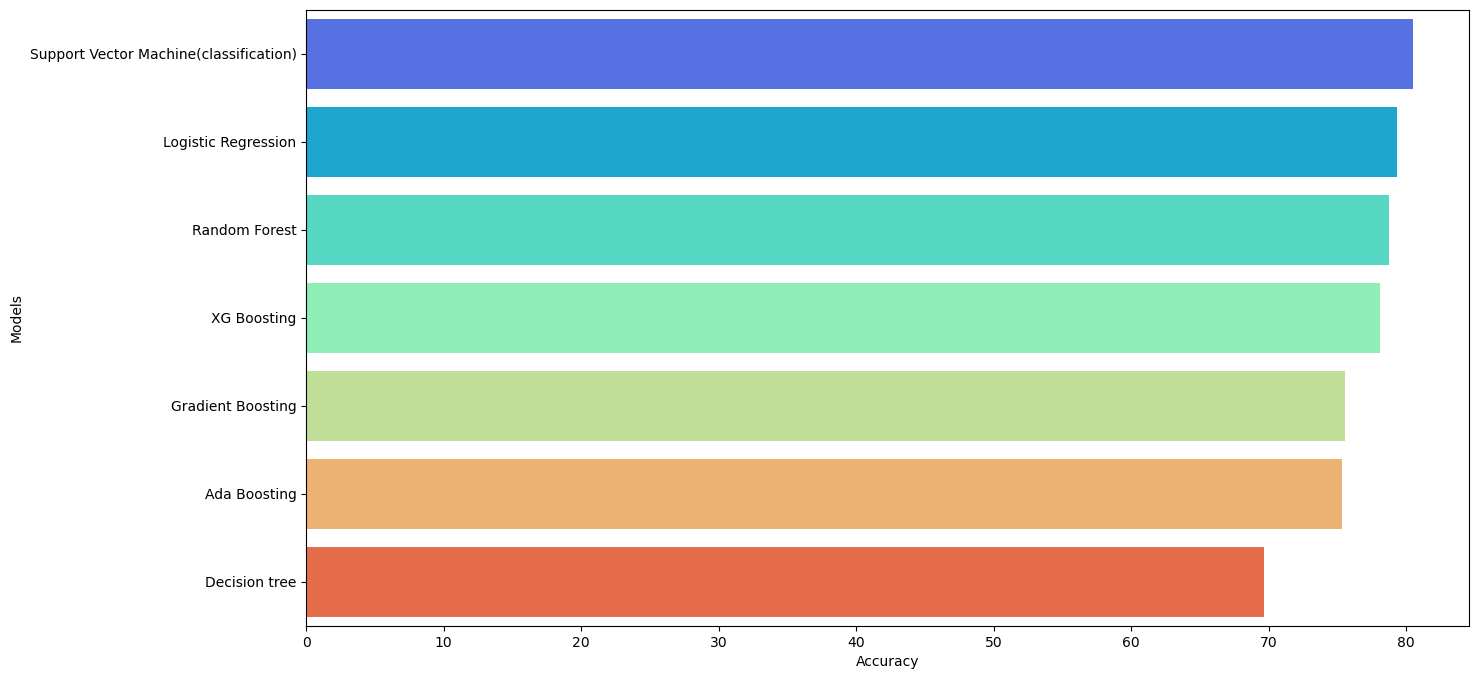

In [70]:
sns.barplot(x=result['Accuracy'],y=result['Models'],palette='rainbow')
plt.show()

# Prediction on Test Dataset:

In [71]:
test_df = test['cleaned text']
test_df

0                                happen terribl car crash
1           heard earthquak differ citi stay safe everyon
2       forest fire spot pond gee flee across street c...
3                          apocalyps light spokan wildfir
4                      typhoon soudelor kill china taiwan
                              ...                        
3258        earthquak safeti los angel safeti fasten xrwn
3259    storm ri wors last hurrican citi amp other har...
3260         green line derail chicago http co utbxlcbiuy
3261    meg issu hazard weather outlook hwo http co x ...
3262      cityofcalgari activ municip emerg plan yycstorm
Name: cleaned text, Length: 3263, dtype: object

In [72]:
x = test['id']
x

0           0
1           2
2           3
3           9
4          11
        ...  
3258    10861
3259    10865
3260    10868
3261    10874
3262    10875
Name: id, Length: 3263, dtype: int64

In [73]:
test_tfidf = tfidf_vectorizer.transform(test_df)
print(test_tfidf)

  (0, 12243)	0.6379426521311179
  (0, 5084)	0.488235986752432
  (0, 2405)	0.41167725644173103
  (0, 1687)	0.43032154298896524
  (1, 11750)	0.3793625999936718
  (1, 10858)	0.41765354569137303
  (1, 5185)	0.3793625999936718
  (1, 3792)	0.33986035730541175
  (1, 3374)	0.3546517053531935
  (1, 2942)	0.42838425312269673
  (1, 2006)	0.336061881685986
  (2, 11837)	0.3036205103135203
  (2, 11645)	0.31300835893292184
  (2, 10941)	0.2652131029710866
  (2, 9622)	0.38337264844854
  (2, 8609)	0.34050640600898224
  (2, 4270)	0.27805190615109615
  (2, 4178)	0.38337264844854
  (2, 4126)	0.19590014667728683
  (2, 1644)	0.34050640600898224
  (2, 89)	0.31300835893292184
  (3, 13792)	0.524877601092374
  (3, 7120)	0.5933251150626945
  (3, 486)	0.6103022298069662
  (4, 12861)	0.4264656469006429
  :	:
  (3259, 2006)	0.22017836187748321
  (3259, 1276)	0.17164200724507067
  (3259, 570)	0.2383020644589863
  (3259, 382)	0.16129754093919815
  (3260, 7147)	0.49756061651805034
  (3260, 5492)	0.12808040099823995
  (

In [74]:
test_pred = svc.predict(test_tfidf)
test_pred = pd.DataFrame(test_pred,columns = ['target'])
test_pred

,target
0,1
1,1
2,1
3,0
4,1
...,...
3258,0
3259,1
3260,1
3261,1


In [75]:
submission_df = pd.concat([x,test_pred],axis=1)
submission_df

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1


# Submission file:

In [76]:
submission_df.to_csv('submission.csv',index=False)

In [77]:
t=submission_df['target'].value_counts()
t

0    2140
1    1123
Name: target, dtype: int64

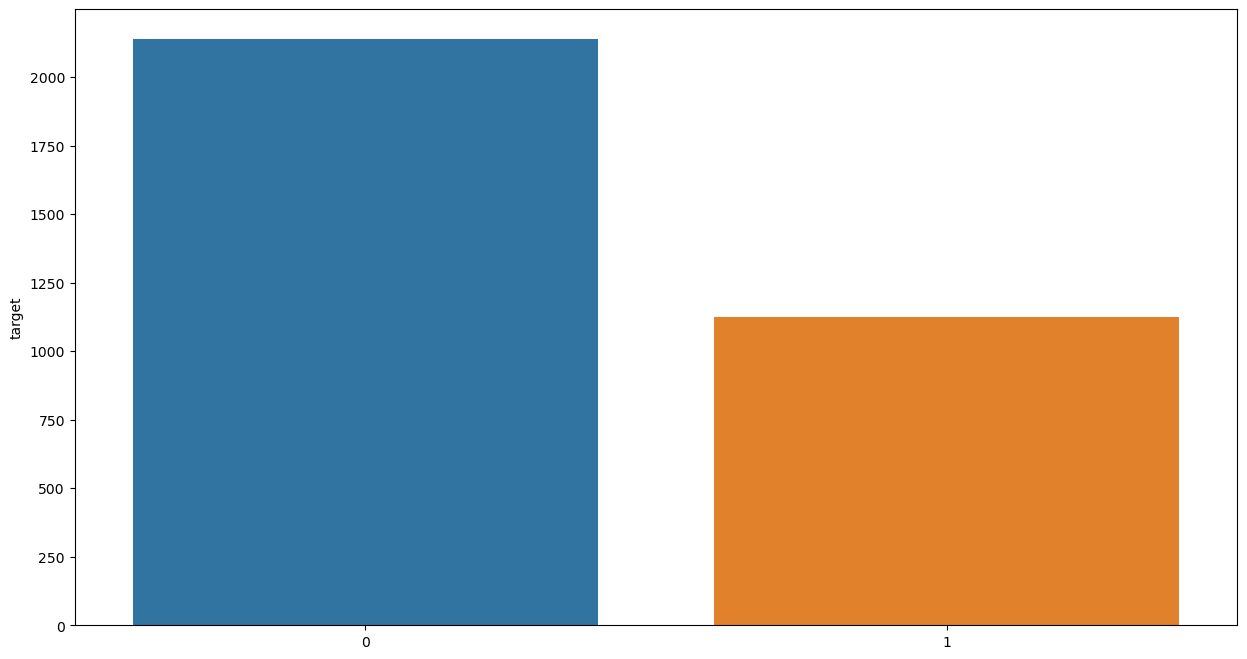

In [78]:
sns.barplot(x=t.index,y=t)
plt.show()